In [3]:
"""Read in the right files"""
BindingProfile='/Users/mallu899/Documents/projects/lacI_CG_master/data/fullLength_txt/BindingProfile'
from matplotlib import rc

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import numpy as np
import pandas as pd
font = {'family' : 'Helvetica','size'   : 9,'weight':  'normal'}
rc('font', **font)  # pass in the font dict as kwargs
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
f_1efa_distance_to_axis = ('AnalysisPy/Binding/1efa_distancesToAxis.txt','r')
f_NMR = ('AnalysisPy/ClosestDistances/1osl_ClosestDist.dat')
f_crystal = ('AnalysisPy/ClosestDistances/1efa_ClosestDist.dat')

In [5]:
p1 = np.array([224/256, 236/256, 244/256, 1])
p2 = np.array([158/256, 160/256, 218/256, 1])
p3 = np.array([136/256, 86/256, 167/256, 1])
g1 = np.array([229/256, 245/256, 249/256, 1])
g2 = np.array([153/256, 216/256, 201/256, 1])
g3 = np.array([44/256, 162/256, 95/256, 1])
o1 = np.array([254/256, 232/256, 200/256, 1])
o2 = np.array([253/256, 187/256, 132/256, 1])
o3 = np.array([227/256, 74/256, 51/256, 1])

In [6]:
lacI_sequence_upto_resid_145='''KPVTLYDVAEYAGVSYQTVSRVVNQASHVSAKTREKVEAAMAELNYIPNRVAQQLAGKQSLLIGVATSSLALHAPSQIVAAIKSRADQLGAS
VVVSMVERSGVEACKTAVHNLLAQRVSGLIINYPLDDQDAIAVEAAC'''
residue_id=np.arange(2,62,1)
lacI_DBD_sequence=[x+str(y) for x,y in zip(lacI_sequence_upto_resid_145[0:60],residue_id)]

In [7]:
NMR_clostest_distance_CA_P = pd.read_csv(f_NMR,header=None, sep='\s+')
crystal_clostest_distance_CA_P = pd.read_csv(f_crystal,header=None, sep='\s+')
df_clostest_distances=pd.DataFrame({'residue':lacI_DBD_sequence+lacI_DBD_sequence,'$d_{Ca-P}\ (Å)$':list(NMR_clostest_distance_CA_P[0][0:60])\
              +list(crystal_clostest_distance_CA_P[0][0:60]),'experiment':['NMR' for x in range(0,60)]+['crystallization' for x in range(0,60)]})
df_clostest_distances

,residue,$d_{Ca-P}\ (Å)$,experiment
0,K2,12.489,NMR
1,P3,11.138,NMR
2,V4,8.789,NMR
3,T5,5.266,NMR
4,L6,5.259,NMR
...,...,...,...
115,A57,7.342,crystallization
116,G58,6.411,crystallization
117,K59,5.403,crystallization
118,Q60,7.555,crystallization


(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 13 Text xticklabel objects>)

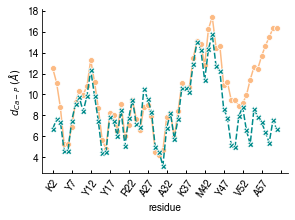

In [8]:
fig=plt.subplots(figsize = (4.2,3.0))
sns.lineplot(data=df_clostest_distances,x='residue',y='$d_{Ca-P}\ (Å)$',hue='experiment',style="experiment",markers=True,ci='sd',palette=[o2,'darkcyan'])

plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.tight_layout()
sns.despine()
plt.xticks(range(0,61,5))
plt.xticks(rotation=55)
#plt.savefig('NMR_cystal_profile',dpi=300,bbox_inches='tight', transparent=True)

The distances to DNA in the S-sate are close to the one of the specific complex. They are overall slightly elevated, but minima and mixima overlap. The specifically binding residue Tyr7 is less close, possibly because it is close to two negatively charged residues. Specifically interacting residues Tur17 and Glu18 very close to their position in the tight specific complex. The closest interacting area in the non-specific complex is the loop of His29. The N-terminal part of helix 3, with 3 positively charged residues instead is pushed up slightly compared to the specific complex that allows this area to come closer to the DNA, possibly due to DNA-kinking.
For the R-state, most areas interact less close, but the loop around His29 shows the greatest flexibility. and can interact as close as in the S-model. The fit of the structured hinge helixes to the straight DNA results in less interactin of this region, but the core domain of the R_state is closer to DNA again.

In [9]:
BindingProfile='fullLacI_BindingProfile/' 

In [10]:
distance_Ca_DNA_S01= pd.read_csv(BindingProfile+'/Footprint_S01.txt', sep='\s+',header=None)
distance_Ca_DNA_R01 = pd.read_csv(BindingProfile+'/Footprint_R01.txt', sep='\s+',header=None)
df_clostest_distances_SvsR=pd.DataFrame({'residue':lacI_DBD_sequence+lacI_DBD_sequence,'$d (Å)$':list(distance_Ca_DNA_S01[0][0:60])\
              +list(distance_Ca_DNA_R01[0][0:60]),'conformation':['$search$' for x in range(0,60)]+['$recognition$' for x in range(0,60)]})

In [11]:
df_clostest_distances_SvsR

,residue,$d (Å)$,conformation
0,K2,19.046,$search$
1,P3,20.674,$search$
2,V4,20.446,$search$
3,T5,17.171,$search$
4,L6,16.649,$search$
...,...,...,...
115,A57,14.437,$recognition$
116,G58,16.506,$recognition$
117,K59,18.673,$recognition$
118,Q60,21.283,$recognition$


(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 13 Text xticklabel objects>)

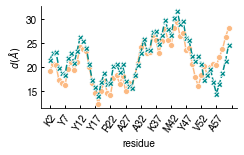

In [12]:
fig, ax = plt.subplots(figsize = (3.5,2.1))
sns.lineplot(data=df_clostest_distances_SvsR,x='residue',y='$d (Å)$',hue='conformation',style="conformation",markers=True,ci='sd',palette=[o2,'darkcyan'])
plt.legend([],[], frameon=False)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='k',direction ='in')
plt.tight_layout()
sns.despine()
plt.xticks(range(0,61,5))
plt.xticks(rotation=55)
#plt.savefig('S_vs_R_profile',dpi=300,bbox_inches='tight', transparent=True)

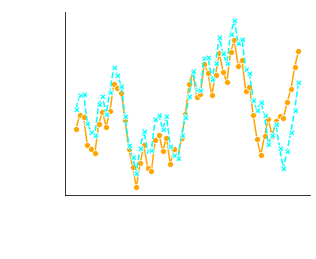

In [14]:
fig=plt.subplots(figsize = (4.5,3.7),frameon=False,edgecolor='white')
sns.lineplot(data=df_clostest_distances_SvsR,x='residue',y='$d (Å)$',hue='conformation',style="conformation",markers=True,ci='sd',palette=['orange','cyan'])


plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    right=False, left=True, labelleft=True,labelsize='medium',
    width = 1,
    length = 3, color='white',direction ='in')
#plt.title('full dimer')
plt.legend(title='conformation',edgecolor='white',loc='upper left',bbox_to_anchor=(1., 1.15),
           markerscale=0.6,fontsize=9,ncol=1,labelspacing=0.2,handlelength=0.3)
plt.legend([],[], frameon=False)
sns.despine()
#plt.ylim(-5,220)
#plt.xlim(0.008,0.045)
plt.ylabel('d (Å))',fontsize = 16,color='white')
plt.xlabel('residues',fontsize = 16,color='white')
plt.xticks(range(0,61,5),fontsize = 16,color='white',rotation=55)
plt.yticks(fontsize = 16,color='white')
plt.tight_layout()
#plt.savefig('S_vs_R_profile_presi',dpi=300,bbox_inches='tight', transparent=True)

For the crystal structure, the whole protein is between 6-10 Å further away from the DNA. The bindning domain, especially helix 1 and 2 are relatively close, the His29 loop is the point that gets closest. Coparing to the S state, H1 and H2 can be closer to the DNA, specifically inding residuesare closer than in the R, but the difference between R and S is less pronounces. The loop with His29 and Arg22 get much closer in S. The N-terminal end of H3 is similarly far away in S, like in R, but here is some difference between the protomers, B is interacting closer here. The hinge helices are the same again in R, but they differ in S. The C-terminal region of H3, with more negative residues is closer for the S as well, which couls result in some repuslion.The hinge region introduces a clear break in the protein for the S-state. The core is further away from the DNA and therefore the DNA-binding regions of the protein. The protein in the R-state is more compact and the core is closer to the DNA. Formation of the kink would result in even closer contact between the protein core and the DNA backbone. 